In [442]:
import numpy as np
import pandas as pd
import itertools

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import yfinance as yf
import datetime

In [443]:
def stationarity_test(X, cutoff=0.01, print_results=False):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if print_results == True:
        if pvalue < cutoff:
            print('p-value = ' + str(pvalue) + '; the series ' + X.name +' is likely stationary.')
        else:
            pass
            #print('p-value = ' + str(pvalue) + '; the series ' + X.name +' is likely non-stationary.')
    else:
        pass
    return pvalue

def cointegration_test(X, Y, cutoff=0.1, print_results=False):
    #Engle-Granger test for cointegration
    score, pvalue, _ = coint(X, Y)
    if print_results == True:
        if pvalue < cutoff:
            print('p-value = ' + str(pvalue) + '; the pair ' + X.name + ' and ' + Y.name + ' is likely cointegrated.')
        else:
            pass
            #print('p-value = ' + str(pvalue) + '; the pair ' + X.name + Y.name + ' is likely not cointegrated.')
    else:
        pass
    return pvalue

In [444]:
#stock_list = ['ABEV', "MDLZ", "CAG", "KDP", "KHC", "MNST", "GIS", "K", "MKC", "CCEP", "HRL", "TAP", "IFF", "ADM", "VDC", "XLP", "IYK", "FTXG"]
stock_list = ['QQQ', 'CIBR', 'AIQ', 'VGT', 'CLDL', 'SNAP', 'GRAB', 'LYFT', 'AI', 'IONQ', 'RBLX', 'U', 'PINS', 'AUR', 'IQ', 'SE', 'TOST', 'PATH', 'S', 'TME', 'ZI', 'SABR', 'BILI', 'EBAY', 'YMM']
end_date = pd.Timestamp.today()
start_date =  end_date - pd.Timedelta(days = 365)
df = yf.download(stock_list, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  25 of 25 completed


In [445]:
df

,AI,AIQ,AUR,BILI,CIBR,CLDL,EBAY,GRAB,IONQ,IQ,...,S,SABR,SE,SNAP,TME,TOST,U,VGT,YMM,ZI
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-12,11.930000,18.536663,2.17,12.49,37.065884,5.870,36.320122,2.48,5.05,2.26,...,22.450001,5.27,57.360001,10.51,3.92,17.920000,30.770000,298.536957,6.16,43.770000
2022-10-13,12.170000,18.984890,2.20,11.87,37.673519,5.980,37.132015,2.47,5.18,2.29,...,21.780001,5.45,54.450001,10.58,3.94,17.700001,30.530001,307.085571,5.98,43.139999
2022-10-14,11.710000,18.367332,2.04,11.18,36.737160,5.620,36.271214,2.39,4.87,2.21,...,20.719999,5.41,51.070000,9.99,3.83,16.980000,28.980000,298.348541,5.72,41.869999
2022-10-17,12.300000,19.174141,2.16,12.09,38.271194,6.160,37.024406,2.46,5.14,2.34,...,22.530001,5.60,52.930000,10.59,3.97,18.680000,30.879999,307.779816,5.96,43.810001
2022-10-18,12.540000,19.271755,2.21,12.28,38.978451,6.420,37.660240,2.50,5.08,2.29,...,22.930000,5.77,53.689999,10.60,3.96,20.270000,31.370001,310.943359,5.89,45.119999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-06,24.750000,27.389999,2.11,13.57,45.869999,8.480,43.009998,3.50,15.29,4.75,...,16.910000,3.88,42.410000,8.63,6.41,17.080000,30.150000,424.200012,7.19,16.930000
2023-10-09,24.709999,27.379999,2.12,13.28,46.310001,8.552,43.349998,3.44,14.64,4.71,...,16.820000,3.82,41.470001,8.61,6.38,17.209999,29.700001,426.149994,7.09,16.930000
2023-10-10,26.719999,27.610001,2.16,14.33,46.619999,8.715,43.520000,3.53,16.00,4.94,...,17.049999,3.95,44.049999,8.82,6.68,18.049999,30.020000,427.559998,7.41,17.170000


In [446]:
stock_pairs = list(itertools.combinations(df.columns, 2))
cointegration_results_df = pd.DataFrame(index=range(len(stock_pairs)),columns=['Stock 1', 'Stock 2', 'Coint. P-Value'])

for i, pair in enumerate(stock_pairs):
    df_pairs = df[list(pair)]
    pvalue = cointegration_test(df_pairs[pair[0]], df_pairs[pair[1]], print_results = True)
    cointegration_results_df['Stock 1'][i] = pair[0]
    cointegration_results_df['Stock 2'][i] = pair[1]
    cointegration_results_df['Coint. P-Value'][i] = pvalue

sorted_coint_df = cointegration_results_df.sort_values(by='Coint. P-Value', ascending = True)

p-value = 0.042680863531520716; the pair AUR and CLDL is likely cointegrated.
p-value = 0.07557201742055841; the pair CIBR and CLDL is likely cointegrated.
p-value = 0.0012708585553468513; the pair CIBR and IONQ is likely cointegrated.
p-value = 0.05454111716418176; the pair CIBR and QQQ is likely cointegrated.
p-value = 0.0037056302293672085; the pair CLDL and IONQ is likely cointegrated.
p-value = 0.08813026634154192; the pair CLDL and QQQ is likely cointegrated.
p-value = 0.024687263756522828; the pair EBAY and GRAB is likely cointegrated.
p-value = 0.05174330472188707; the pair EBAY and IONQ is likely cointegrated.
p-value = 0.04318388681072781; the pair EBAY and IQ is likely cointegrated.
p-value = 0.037510223313287426; the pair EBAY and LYFT is likely cointegrated.
p-value = 0.06092727441457943; the pair EBAY and PATH is likely cointegrated.
p-value = 0.06611706285065619; the pair EBAY and PINS is likely cointegrated.
p-value = 0.08093409380586603; the pair EBAY and QQQ is likely

In [447]:
etf_sorted_coint_df = sorted_coint_df[sorted_coint_df['Stock 1'].isin(['QQQ', 'CIBR', 'AIQ', 'VGT', 'CLDL'])]
etf_sorted_coint_df = etf_sorted_coint_df[etf_sorted_coint_df['Coint. P-Value'] <= 0.1]

etf_sorted_coint_df

,Stock 1,Stock 2,Coint. P-Value
93,CIBR,IONQ,0.001271
112,CLDL,IONQ,0.003706
98,CIBR,QQQ,0.054541
90,CIBR,CLDL,0.075572
117,CLDL,QQQ,0.08813


Stock 1: CIBR; Stock 2: IONQ


<Axes: xlabel='Date'>

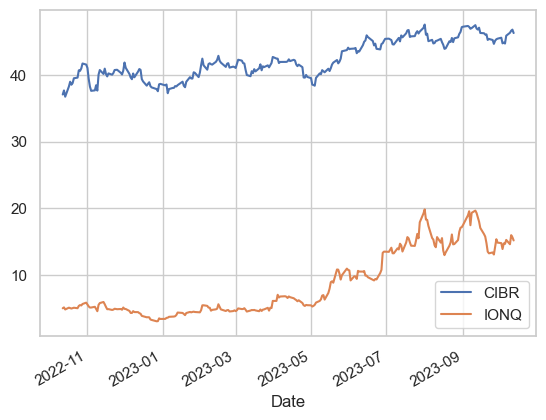

In [448]:
etf_sorted_coint_df

stock_1 = etf_sorted_coint_df['Stock 1'].iloc[0]
stock_2 = etf_sorted_coint_df['Stock 2'].iloc[0]

print(f'Stock 1: {stock_1}; Stock 2: {stock_2}')

df[[stock_1, stock_2]].plot()

In [449]:
Y = df[stock_1]
X = df[stock_2]
X_with_constant = sm.add_constant(X)
model = OLS(Y, X_with_constant).fit()
spread = Y - model.predict()
spread = spread.rename("Spread")

<Axes: xlabel='Date'>

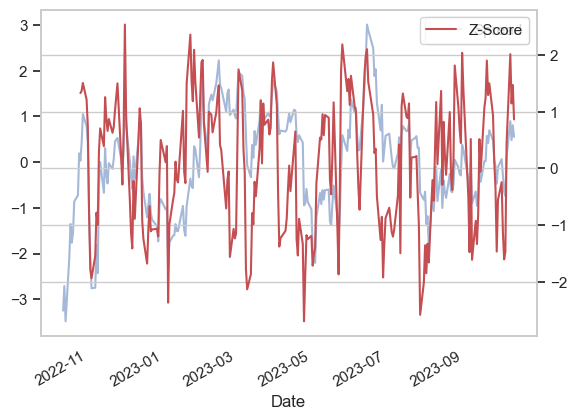

In [450]:
window_size = 11
spread_mean = spread.rolling(window=window_size).mean()
spread_std = spread.rolling(window=window_size).std()
zscore = ((spread - spread_mean)/spread_std)
first_valid_idx = zscore.first_valid_index()
zscore = zscore.rename("Z-Score")

plot_df_zscore = pd.merge(spread, zscore, right_index = True, left_index = True)
plot_df_zscore.plot(y='Spread', grid=False, color='b', alpha=0.50)
ax2 = plt.twinx()
plot_df_zscore.plot(y='Z-Score', ax=ax2, color='r')

In [451]:
criteria_list = list()
entry_threshold_list = list()
exit_threshold_list = list()
share_ratios_list = list()
window_size_list = list()

for entry_threshold in np.arange(0.5, 1.4, 0.1):
    for exit_threshold in np.arange (1.5, 2.0, 0.1):
        for share_ratio in np.arange (0.1, 0.9, 0.1):
            for window_size in np.arange(10, 30, 1):

                spread_mean = spread.rolling(window=window_size).mean()
                spread_std = spread.rolling(window=window_size).std()
                zscore = ((spread - spread_mean)/spread_std)
                first_valid_idx = zscore.first_valid_index()
                zscore = zscore.dropna().rename("Z-Score")

                stock1_position = pd.Series(data=0, index=zscore.index)
                stock2_position = pd.Series(data=0, index=zscore.index)

                for i in range(1, len(zscore)):
                    if zscore.iloc[i] < -entry_threshold and stock1_position.iloc[i-1] == 0:
                        stock1_position.iloc[i] = 1
                        stock2_position.iloc[i] = -1
                    elif zscore.iloc[i] > entry_threshold and stock2_position.iloc[i-1] == 0:
                        stock1_position.iloc[i] = -1
                        stock2_position.iloc[i] = 1
                    elif abs(zscore.iloc[i]) < exit_threshold:
                        stock1_position.iloc[i] = 0
                        stock2_position.iloc[i] = 0
                    else:
                        stock1_position.iloc[i]=stock1_position.iloc[i-1]
                        stock2_position.iloc[i]=stock2_position.iloc[i-1]

                stock1_returns = df[stock_1][first_valid_idx:].pct_change() * stock1_position.shift(1).fillna(0)
                stock2_returns = df[stock_2][first_valid_idx:].pct_change() * stock2_position.shift(1).fillna(0)

                total_returns = share_ratio * stock1_returns + (1-share_ratio) * stock2_returns
                cumulative_returns = (1 + total_returns).cumprod()
                cumulative_returns.iloc[0] = 1

                criterion =  (1 + cumulative_returns.iloc[-1]) / (1 + cumulative_returns.iloc[0] - np.min([cumulative_returns.min(), 1]))
                
                criteria_list.append(criterion)
                entry_threshold_list.append(entry_threshold)
                exit_threshold_list.append(exit_threshold)
                share_ratios_list.append(share_ratio)
                window_size_list.append(window_size)

In [452]:
strategy_test_df = pd.DataFrame({'Criterion Metric':criteria_list, 'Z-Score Window': window_size_list, 'Entry Thresholds':entry_threshold_list, 'Exit Thresholds':exit_threshold_list, 'Share 1 to 2 Ratios':share_ratios_list})
sorted_strategy_df = strategy_test_df.sort_values(by='Criterion Metric', ascending = False)
print(sorted_strategy_df)

      Criterion Metric  Z-Score Window  Entry Thresholds  Exit Thresholds  \
5442          3.612665              12               1.1              1.9   
5282          3.394513              12               1.1              1.8   
5462          3.373013              12               1.1              1.9   
4801          3.372534              11               1.1              1.5   
4962          3.357110              12               1.1              1.6   
...                ...             ...               ...              ...   
2899          1.425119              29               0.8              1.8   
2739          1.399555              29               0.8              1.7   
2439          1.387882              29               0.8              1.5   
6578          1.348352              28               1.3              1.6   
2419          1.296162              29               0.8              1.5   

      Share 1 to 2 Ratios  
5442                  0.1  
5282               

<Axes: xlabel='Date'>

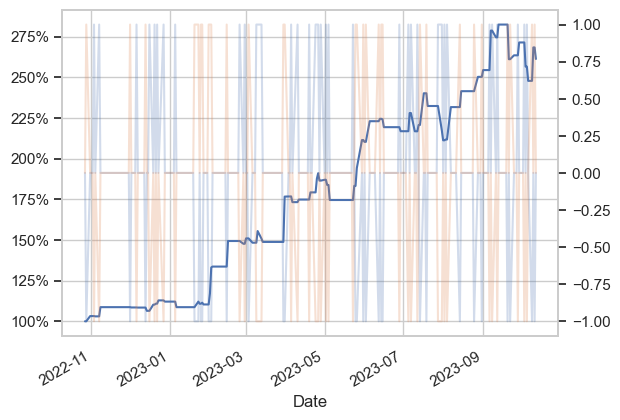

In [453]:
from matplotlib.ticker import PercentFormatter 

entry_threshold = sorted_strategy_df['Entry Thresholds'].iloc[0]
exit_threshold = sorted_strategy_df['Exit Thresholds'].iloc[0]
share_ratio = sorted_strategy_df['Share 1 to 2 Ratios'].iloc[0]
window_size = sorted_strategy_df['Z-Score Window'].iloc[0]

spread_mean = spread.rolling(window=window_size).mean()
spread_std = spread.rolling(window=window_size).std()
zscore = ((spread - spread_mean)/spread_std)
first_valid_idx = zscore.first_valid_index()
zscore = zscore.dropna().rename("Z-Score")

stock1_position = pd.Series(data=0, index=zscore.index)
stock2_position = pd.Series(data=0, index=zscore.index)

for i in range(1, len(zscore)):
    if zscore.iloc[i] < -entry_threshold and stock1_position.iloc[i-1] == 0:
        stock1_position.iloc[i] = 1
        stock2_position.iloc[i] = -1
    elif zscore.iloc[i] > entry_threshold and stock2_position.iloc[i-1] == 0:
        stock1_position.iloc[i] = -1
        stock2_position.iloc[i] = 1
    elif abs(zscore.iloc[i]) < exit_threshold:
        stock1_position.iloc[i] = 0
        stock2_position.iloc[i] = 0
    else:
        stock1_position.iloc[i]=stock1_position.iloc[i-1]
        stock2_position.iloc[i]=stock2_position.iloc[i-1]

stock1_returns = df[stock_1][first_valid_idx:].pct_change() * stock1_position.shift(1).fillna(0)
stock2_returns = df[stock_2][first_valid_idx:].pct_change() * stock2_position.shift(1).fillna(0)

total_returns = share_ratio * stock1_returns + (1-share_ratio) * stock2_returns
cumulative_returns = (1 + total_returns).cumprod()
cumulative_returns.iloc[0] = 1

cumulative_returns = cumulative_returns*100
cumulative_returns.plot().yaxis.set_major_formatter(PercentFormatter())
ax2 = plt.twinx()
stock1_position.plot(ax=ax2, alpha = 0.25, grid = False)
stock2_position.plot(ax=ax2, alpha = 0.25, grid = False)

In [454]:
def read_position(pos):
    if pos == 1:
        return("Long")
    if pos == -1:
        return("Short")
    if pos == 0:
        return("EXIT")

p_value = cointegration_test(df[stock_1], df[stock_2], print_results = True)
spread_stationarity_pvalue = stationarity_test(spread, print_results=True)

print(read_position(stock1_position.iloc[-1]), stock_1)
print(read_position(stock2_position.iloc[-1]), stock_2)

stock1_price = np.round(df[stock_1].iloc[-1], 2)
stock2_price = np.round(df[stock_2].iloc[-1], 2)

budget = 1000
exposure_risk = 0.10
wager = budget * exposure_risk

stock1_ideal_value = (share_ratio*wager)
stock2_ideal_value = (1-share_ratio)*wager

stock1_actual_shares = np.floor(stock1_ideal_value/stock1_price)
stock2_actual_shares = np.floor(stock2_ideal_value/stock2_price)

stock1_actual_value = np.round(stock1_actual_shares * stock1_price, 2)
stock2_actual_value = np.round(stock2_actual_shares * stock2_price, 2)
    
print("This corresponds to:")
if stock1_position.iloc[-1] != 0:
    print(f"{read_position(stock1_position.iloc[-1])} {stock1_actual_shares} share(s) of {stock_1} for {stock1_actual_value}")
else:
    print(f"{read_position(stock1_position.iloc[-1])} share(s) of {stock_1}")

if stock2_position.iloc[-1] != 0:
    print(f"{read_position(stock2_position.iloc[-1])} {stock2_actual_shares} share(s) of {stock_2} for {stock2_actual_value}")
else:
    print(f"{read_position(stock2_position.iloc[-1])} share(s) of {stock_2}")


p-value = 0.0012708585553468513; the pair CIBR and IONQ is likely cointegrated.
p-value = 0.0002117551819257607; the series Spread is likely stationary.
EXIT CIBR
EXIT IONQ
This corresponds to:
EXIT share(s) of CIBR
EXIT share(s) of IONQ
